In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statistics as st
%matplotlib inline

## Cleaning data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-TheCompleteGuide/main/googleplaystore.csv")

In [3]:
copy_data = data.copy()

In [4]:
copy_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
copy_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
copy_data.shape

(10841, 13)

In [7]:
copy_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8278,Pepsi Cards DC,COMICS,NaN,1,21M,50+,Free,0,Everyone 10+,Comics,"June 26, 2018",0.0.4,4.4 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
9058,iCluster - The DX-Cluster database,COMMUNICATION,NaN,0,17M,10+,Paid,$0.99,Everyone,Communication,"July 26, 2018",1.7,6.0 and up
5689,Love Dance,GAME,4.0,29462,44M,"1,000,000+",Free,0,Teen,Music,"June 14, 2018",1.1.7,4.0 and up
7983,Resume / CV,BUSINESS,3.6,125,5.0M,"10,000+",Free,0,Everyone,Business,"December 28, 2015",2.0,2.3.3 and up


In [8]:
copy_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# # #clean
# # Reviews
# # Size
# # Installs
# # Price
# # Last Updated
# Android Ver

In [10]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
len(copy_data[copy_data.duplicated()])

483

In [12]:
copy_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [13]:
copy_data.drop(10472,inplace=True)

In [14]:
# change the data type to numeric
# data[data.Reviews.str.isnumeric()]
copy_data["Reviews"] = pd.to_numeric(copy_data["Reviews"])

In [15]:
copy_data["Reviews"].dtypes

dtype('int64')

In [16]:
copy_data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
copy_data["Size"] = copy_data["Size"].str.replace("M","000")

In [18]:
copy_data["Size"] = copy_data["Size"].str.replace("k","")

In [19]:
copy_data["Size"] = copy_data["Size"].str.replace('Varies with device',str(np.nan))

In [20]:
# change data type in float
copy_data["Size"] = copy_data["Size"].astype("float")

In [21]:
for i in copy_data["Size"]:
    if i < 10:
        copy_data["Size"] = copy_data["Size"].replace(i,i*1000)    

In [22]:
copy_data["Size"][:10]

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
5     5600.0
6    19000.0
7    29000.0
8    33000.0
9     3100.0
Name: Size, dtype: float64

In [23]:
copy_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [24]:
copy_data["Installs"] = copy_data["Installs"].str.replace("+","")

In [25]:
copy_data["Installs"]  = copy_data["Installs"].str.replace(",","")

In [26]:
copy_data["Installs"][:5]

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [27]:
copy_data["Installs"] = pd.to_numeric(copy_data["Installs"])

In [28]:
copy_data["Installs"].dtypes

dtype('int64')

In [29]:
copy_data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [30]:
copy_data["Price"] = copy_data["Price"].str.replace("$","")

In [31]:
copy_data["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [32]:
copy_data["Price"] = copy_data["Price"].astype("float")

In [33]:
copy_data["Last Updated"] = pd.to_datetime(copy_data["Last Updated"])

In [34]:
copy_data["year"] = copy_data["Last Updated"].dt.year

In [35]:
copy_data["month"] = copy_data["Last Updated"].dt.month

In [36]:
copy_data["day"] = copy_data["Last Updated"].dt.day

In [37]:
copy_data["Android Ver"] = copy_data["Android Ver"].str.replace("and up","")

In [38]:
copy_data["Android Ver"] = copy_data["Android Ver"].str.replace("Varies with device",str(np.nan))

In [39]:
copy_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6,20


## Analysing data by using graps

In [40]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  year            10840 non-null  int64         
 14  month           10840 non-null  int64         
 15  da

In [41]:
copy_data.describe()

,Rating,Reviews,Size,Installs,Price,year,month,day
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21506.534062,1.546434e+07,1.027368,2017.399723,6.422325,15.609041
std,0.515219,2.927761e+06,22596.020795,8.502936e+07,15.949703,1.100914,2.578388,9.561621
min,1.000000,0.000000e+00,10.000000,0.000000e+00,0.000000,2010.000000,1.000000,1.000000
25%,4.000000,3.800000e+01,4900.000000,1.000000e+03,0.000000,2017.000000,5.000000,6.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,2018.000000,7.000000,16.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,2018.000000,8.000000,24.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018.000000,12.000000,31.000000


In [42]:
# univarite/bivariente and multivariante

In [43]:
copy_data[copy_data.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3,2018,2,26
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,nan,2018,7,31
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,2018,7,24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,2018,7,20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,2018,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0,2016,2,25
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0,2018,7,6
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4,2018,3,24
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4,2018,7,30


In [44]:
copy_data = copy_data.drop_duplicates(subset="App",keep="first")

In [45]:
copy_data.shape

(9659, 16)

In [46]:
# fatch catigerocal/and numerical collemens

In [47]:
catigerocal_features = copy_data.dtypes[copy_data.dtypes == "object"].index

In [48]:
catigerocal_features

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [49]:
# [i for i in copy_data.columns if copy_data[i].dtypes == "object"]

In [50]:
numeric_features = copy_data.dtypes[copy_data.dtypes != "object"].index

In [51]:
numeric_features

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'year', 'month', 'day'],
      dtype='object')

In [52]:
copy_data[numeric_features].head()

,Rating,Reviews,Size,Installs,Price,Last Updated,year,month,day
0,4.1,159,19000.0,10000,0.0,2018-01-07,2018,1,7
1,3.9,967,14000.0,500000,0.0,2018-01-15,2018,1,15
2,4.7,87510,8700.0,5000000,0.0,2018-08-01,2018,8,1
3,4.5,215644,25000.0,50000000,0.0,2018-06-08,2018,6,8
4,4.3,967,2800.0,100000,0.0,2018-06-20,2018,6,20


In [53]:
copy_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018,1,15


In [54]:
copy_data["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [55]:
copy_data["Type"].value_counts(normalize=True)*100

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

In [56]:
for i in catigerocal_features:
    print(i,copy_data[i].value_counts(normalize=True)*100)
    

App Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
Category FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
S

In [57]:
copy_data["Content Rating"].value_counts(normalize=True)*100

Everyone           81.820064
Teen               10.725748
Mature 17+          4.068744
Everyone 10+        3.333678
Adults only 18+     0.031059
Unrated             0.020706
Name: Content Rating, dtype: float64

Text(0.5, 1.0, 'Countplot of Type')

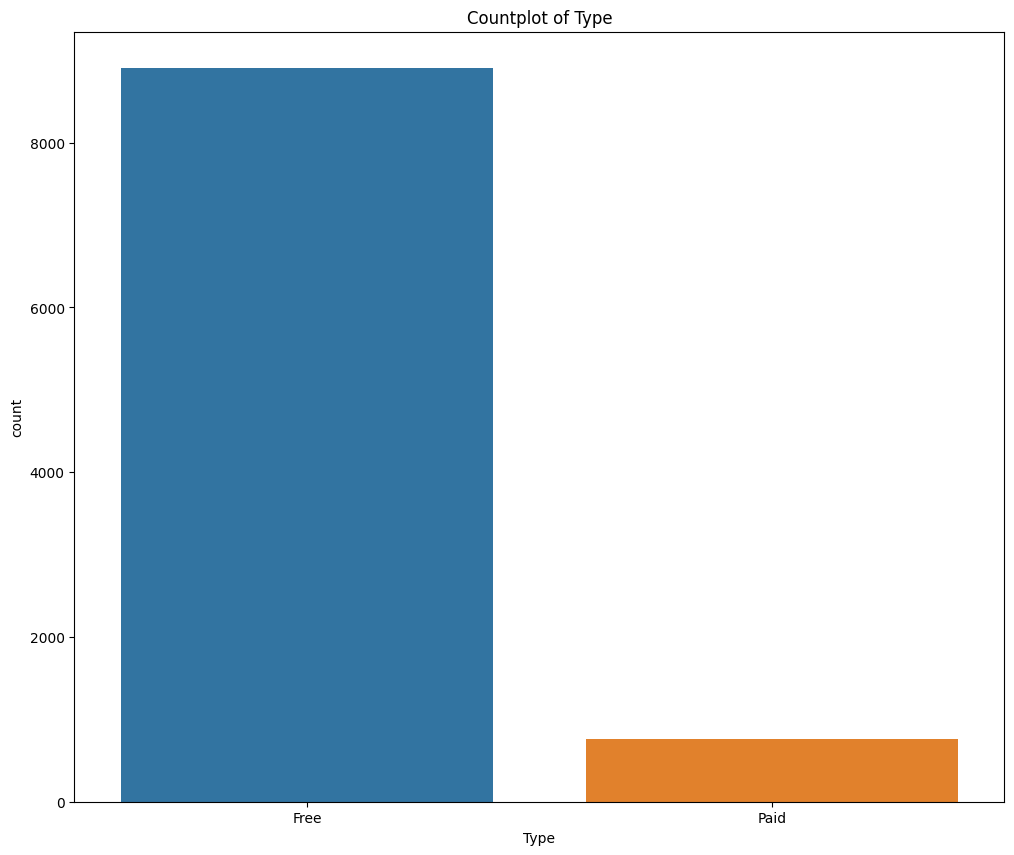

In [58]:
# plot countplot
plt.figure(figsize=(12,10))
sns.countplot(copy_data["Type"])
plt.title("Countplot of Type")

Text(0.5, 1.0, 'Countplot of Rating')

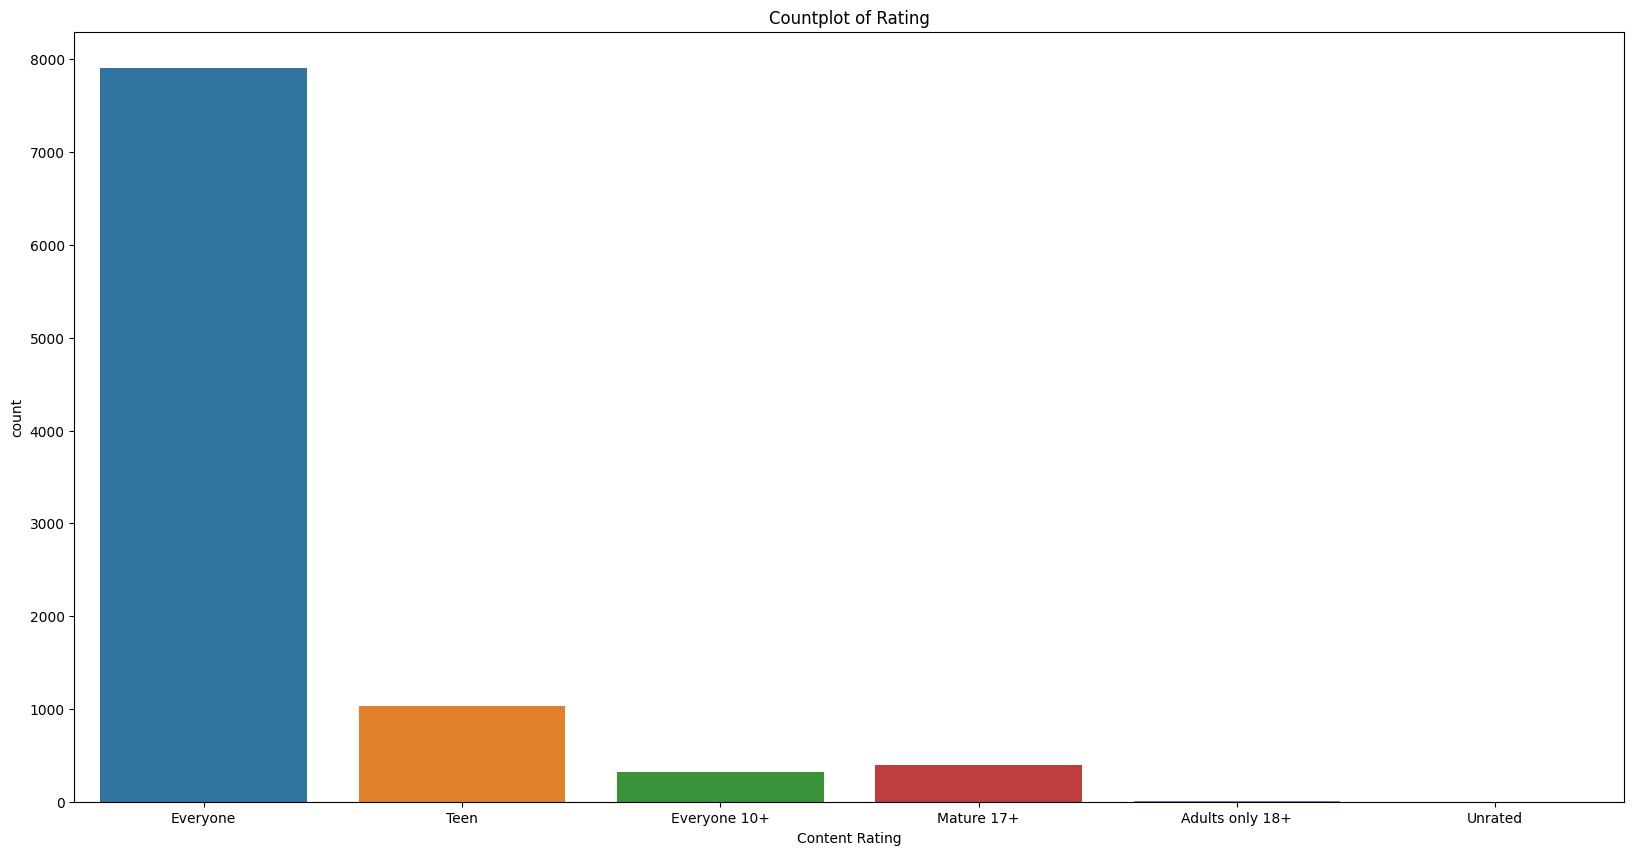

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(copy_data["Content Rating"])
plt.title("Countplot of Rating")

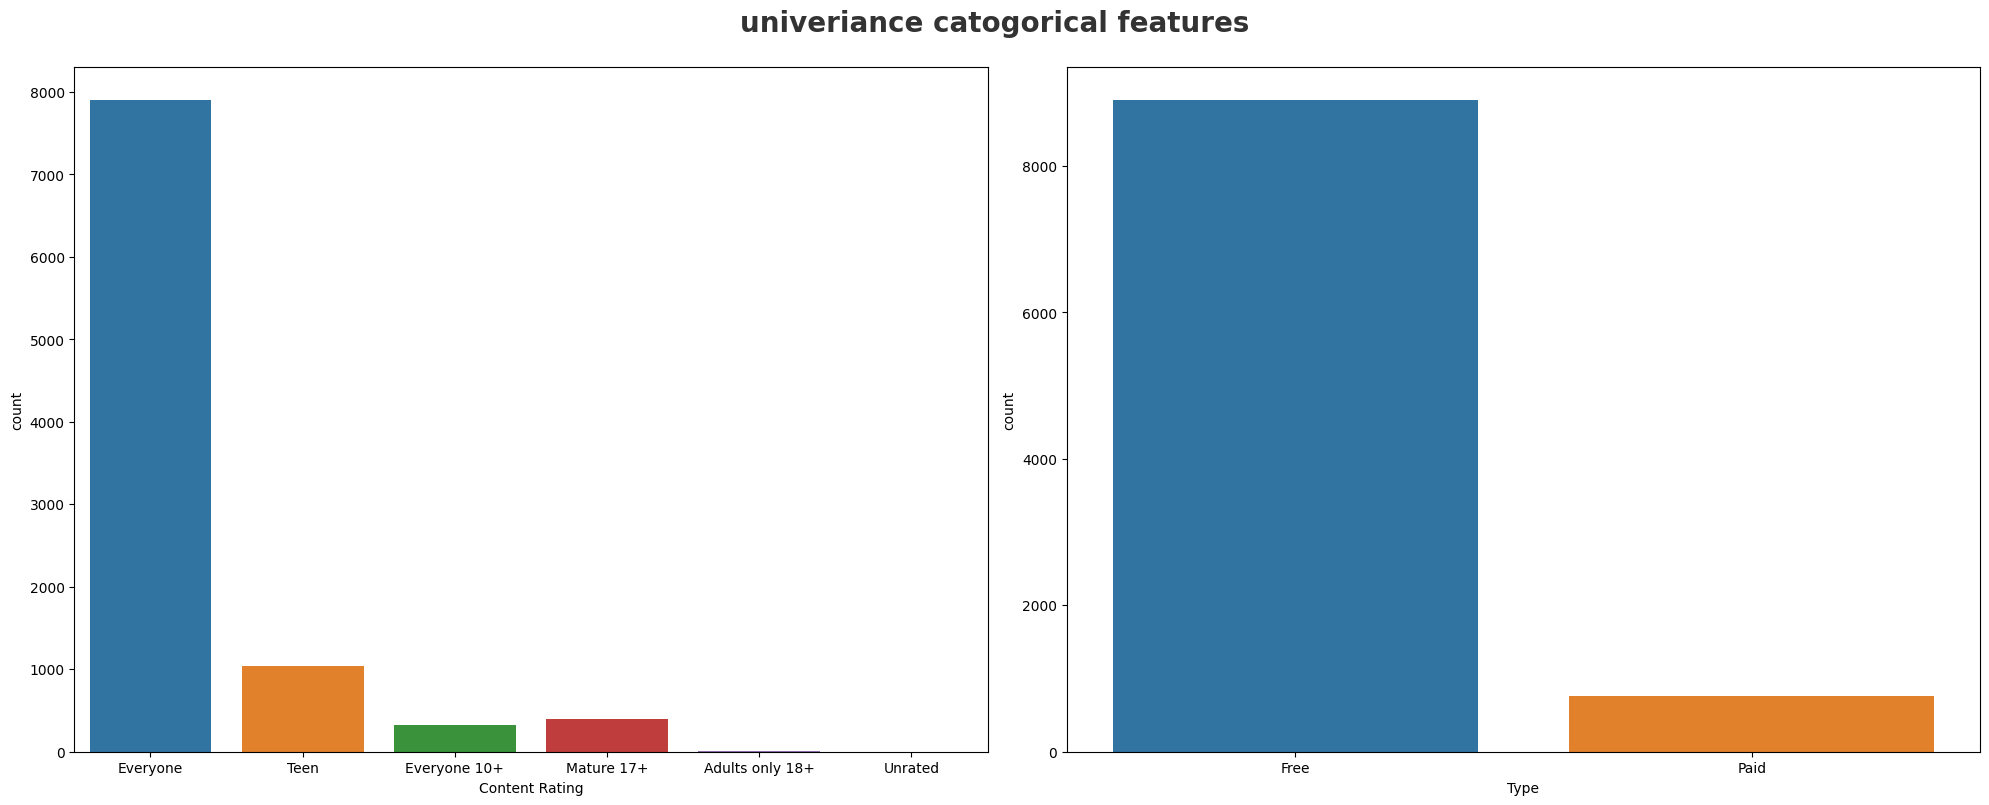

In [60]:
plt.figure(figsize=(20,15))
plt.suptitle("univeriance catogorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
cato = ["Content Rating","Type"]
for i in range(0,len(cato)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = copy_data[cato[i]])
    plt.tight_layout()

In [61]:
numeric_features

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'year', 'month', 'day'],
      dtype='object')

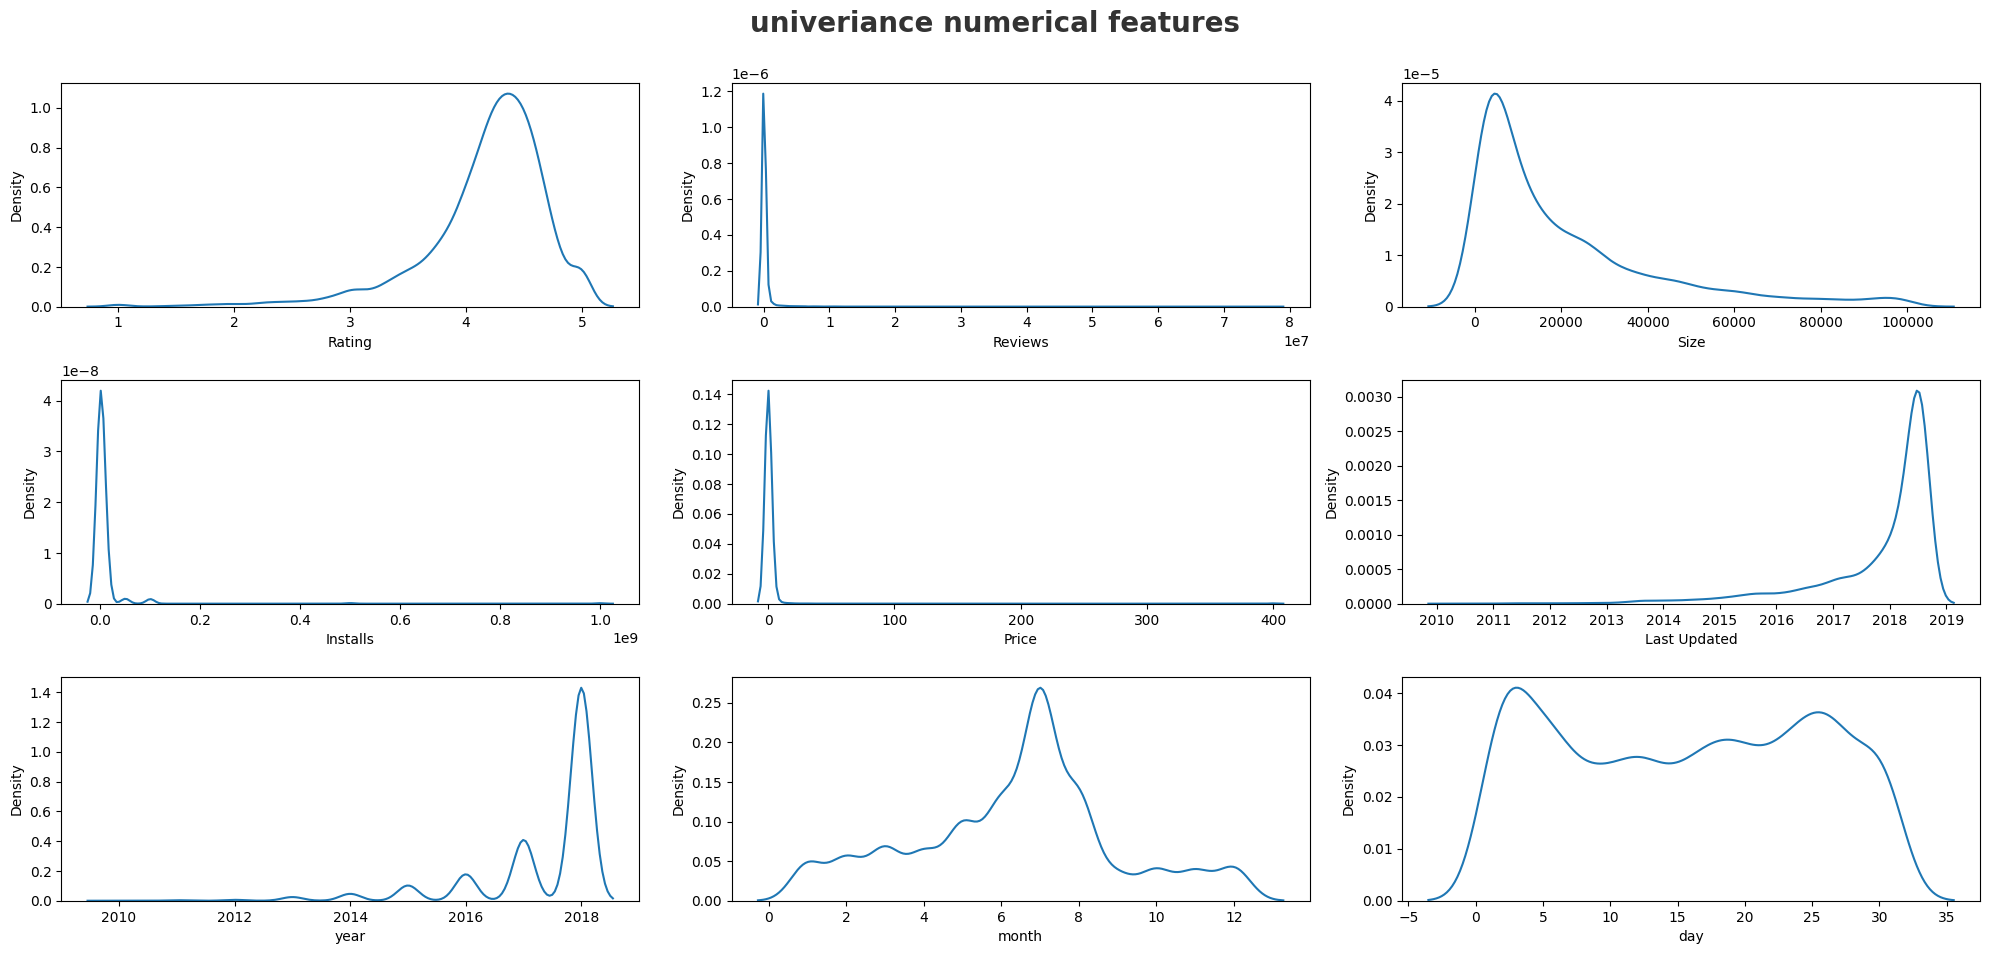

In [62]:
# numerical plot ofdata
plt.figure(figsize=(20,15))
plt.suptitle("univeriance numerical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = copy_data[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<AxesSubplot:ylabel='Category'>

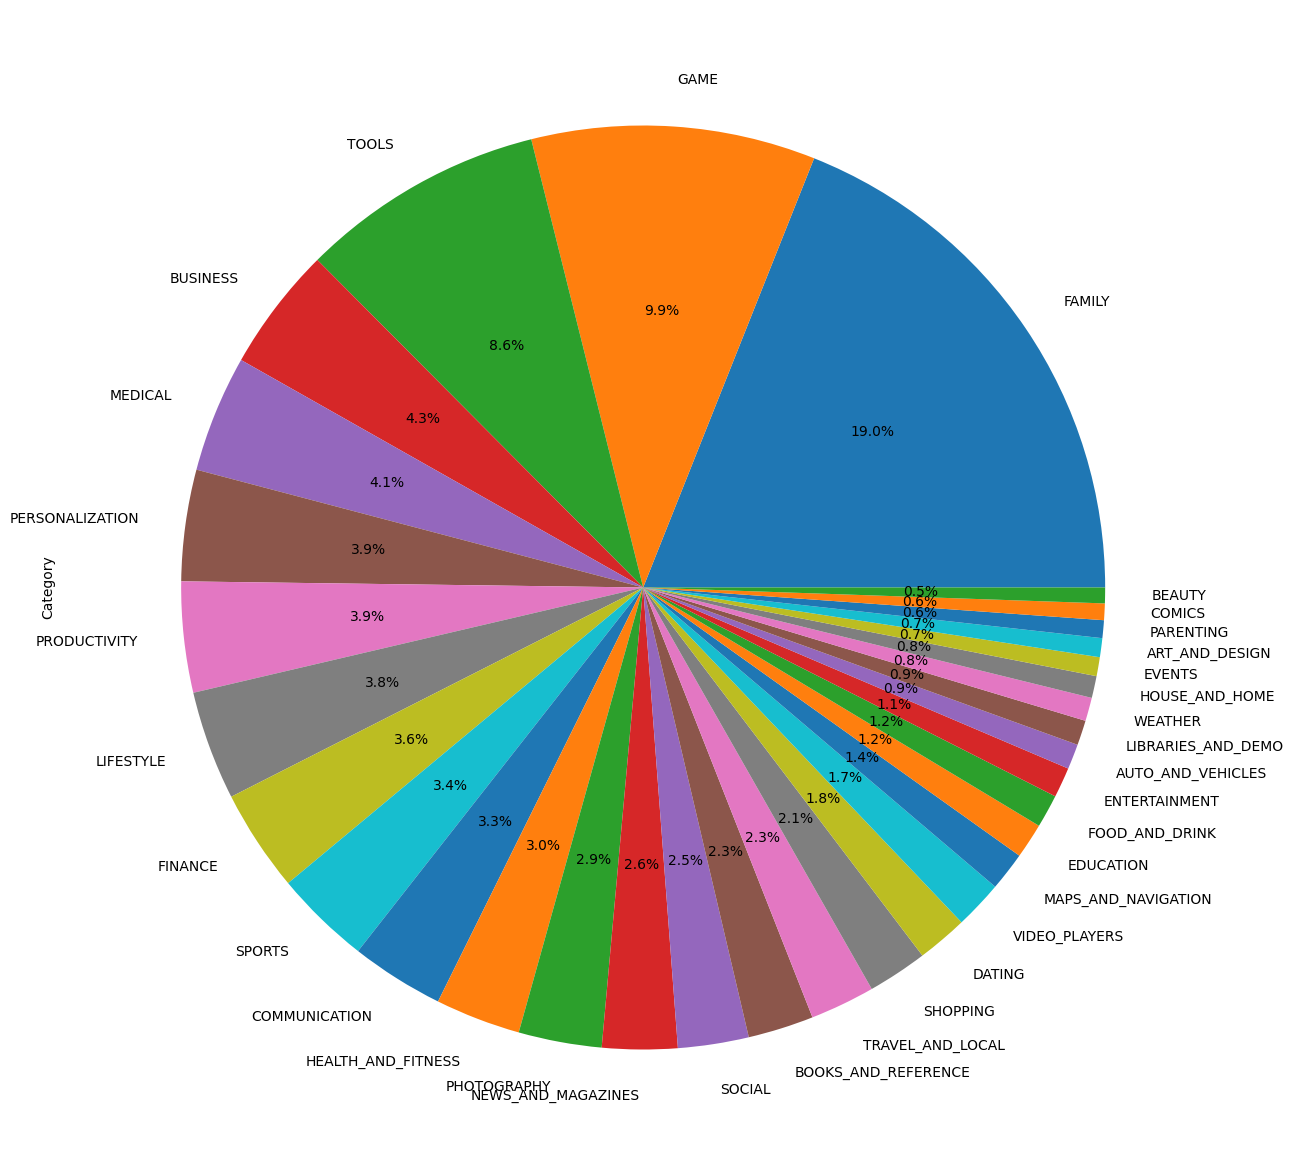

In [63]:
# find out most popular catigory
plt.figure(figsize=(20,15))
copy_data["Category"].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:>

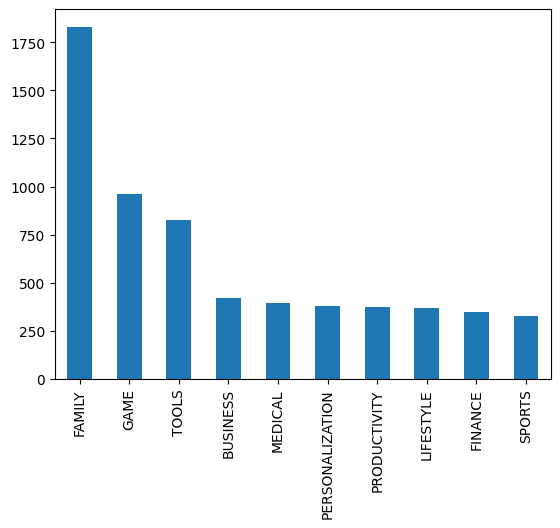

In [64]:
# top 10 cato
copy_data["Category"].value_counts().head(10).plot.bar()

In [65]:
# which cato s large no of instalment
# bivariente analysis
install = copy_data.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

In [66]:
install

Category
GAME                  13878924415
COMMUNICATION         11038276251
TOOLS                  8001771915
PRODUCTIVITY           5793091369
SOCIAL                 5487867902
PHOTOGRAPHY            4649147655
FAMILY                 4427941505
VIDEO_PLAYERS          3926902720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64

Text(0.5, 1.0, ' largest number fo instllation')

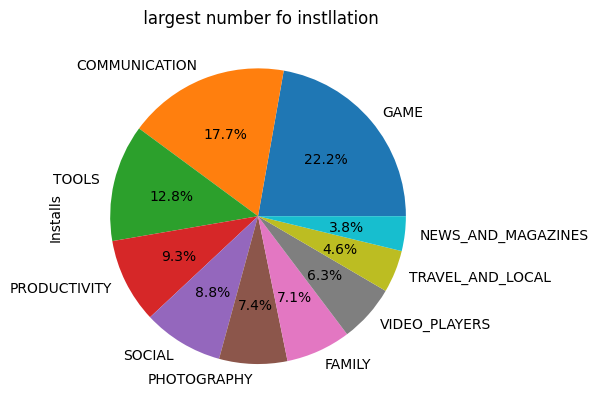

In [67]:
install.plot.pie(autopct="%1.1f%%")
plt.title(" largest number fo instllation")

In [68]:
sample_app_install = copy_data.groupby(["App","Category"])["Installs"].sum().sort_values(ascending=False).reset_index().head(10)

In [69]:
sample_app_install

,App,Category,Installs
0,Google Photos,PHOTOGRAPHY,1000000000
1,Google+,SOCIAL,1000000000
2,Google Drive,PRODUCTIVITY,1000000000
3,Gmail,COMMUNICATION,1000000000
4,Google News,NEWS_AND_MAGAZINES,1000000000
5,Skype - free IM & video calls,COMMUNICATION,1000000000
6,Google Play Books,BOOKS_AND_REFERENCE,1000000000
7,Google Play Games,ENTERTAINMENT,1000000000
8,Google Play Movies & TV,VIDEO_PLAYERS,1000000000
9,Google Street View,TRAVEL_AND_LOCAL,1000000000


<AxesSubplot:xlabel='Installs', ylabel='App'>

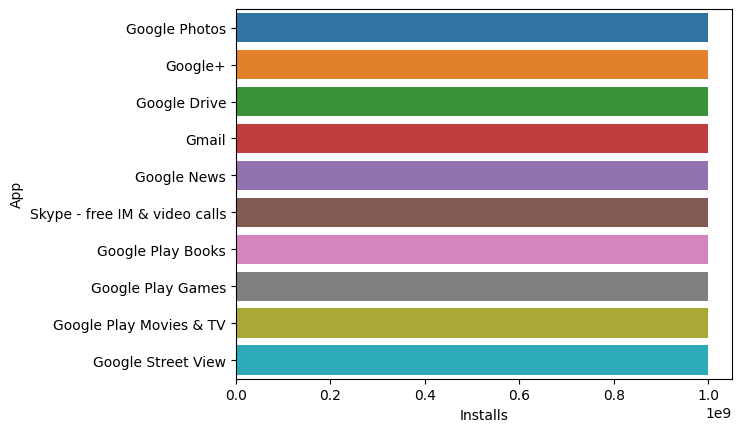

In [70]:
sns.barplot(x="Installs",y="App",data=sample_app_install)

In [75]:
rating = copy_data.groupby("App")["Rating"].sum().sort_values(ascending=False).reset_index().head(10)

In [76]:
rating

,App,Rating
0,Comunidad De Fe Minitries,5.0
1,Tablet Reminder,5.0
2,Noticias FC Barcelona,5.0
3,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
4,DC N COMPANY ENTERTAINMENT RADIO!,5.0
5,Sway Medical,5.0
6,DB Pickles,5.0
7,DB HOME,5.0
8,D-H Pharmacy,5.0
9,TI-84 CE Graphing Calculator Manual TI 84,5.0


<AxesSubplot:xlabel='App', ylabel='Rating'>

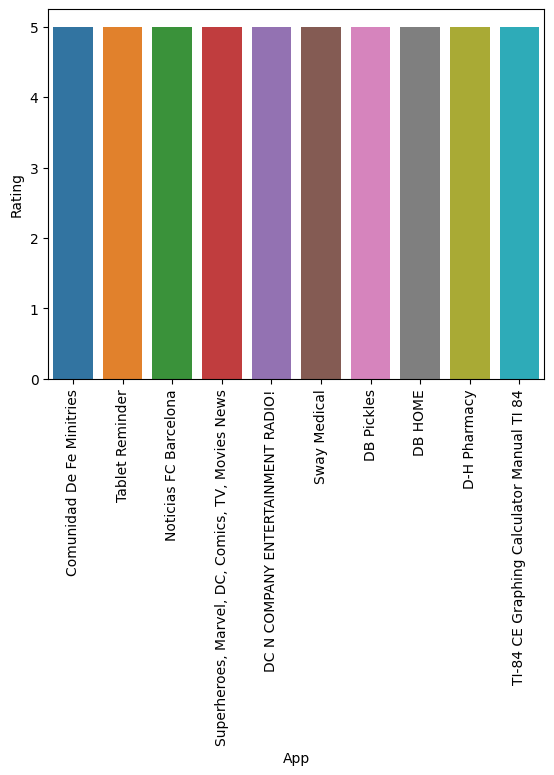

In [80]:
plt.xticks(rotation=90)
sns.barplot(x="App",y="Rating",data=rating)

<AxesSubplot:xlabel='Price', ylabel='Category'>

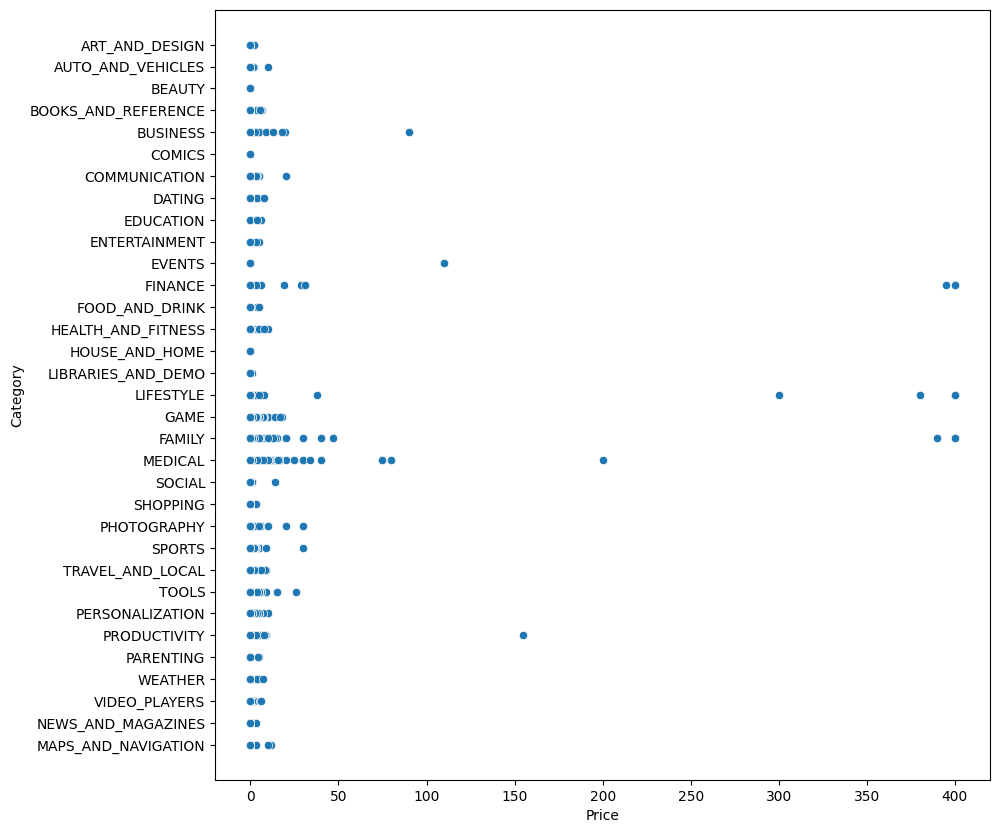

In [87]:
plt.figure(figsize=(10,10))
sns.scatterplot(y="Category", x="Price",data=copy_data)

In [96]:
# which catogery app users are reviwing the most
reviews = copy_data.groupby(["Category","App"])["Reviews"].sum().sort_values(ascending=False).reset_index().head(10)

In [103]:
reviews

,Category,App,Reviews
0,SOCIAL,Facebook,78158306
1,COMMUNICATION,WhatsApp Messenger,69119316
2,SOCIAL,Instagram,66577313
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847
4,GAME,Clash of Clans,44891723
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526
6,GAME,Subway Surfers,27722264
7,VIDEO_PLAYERS,YouTube,25655305
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
9,GAME,Clash Royale,23133508


Text(0.5, 1.0, 'Most ReView App')

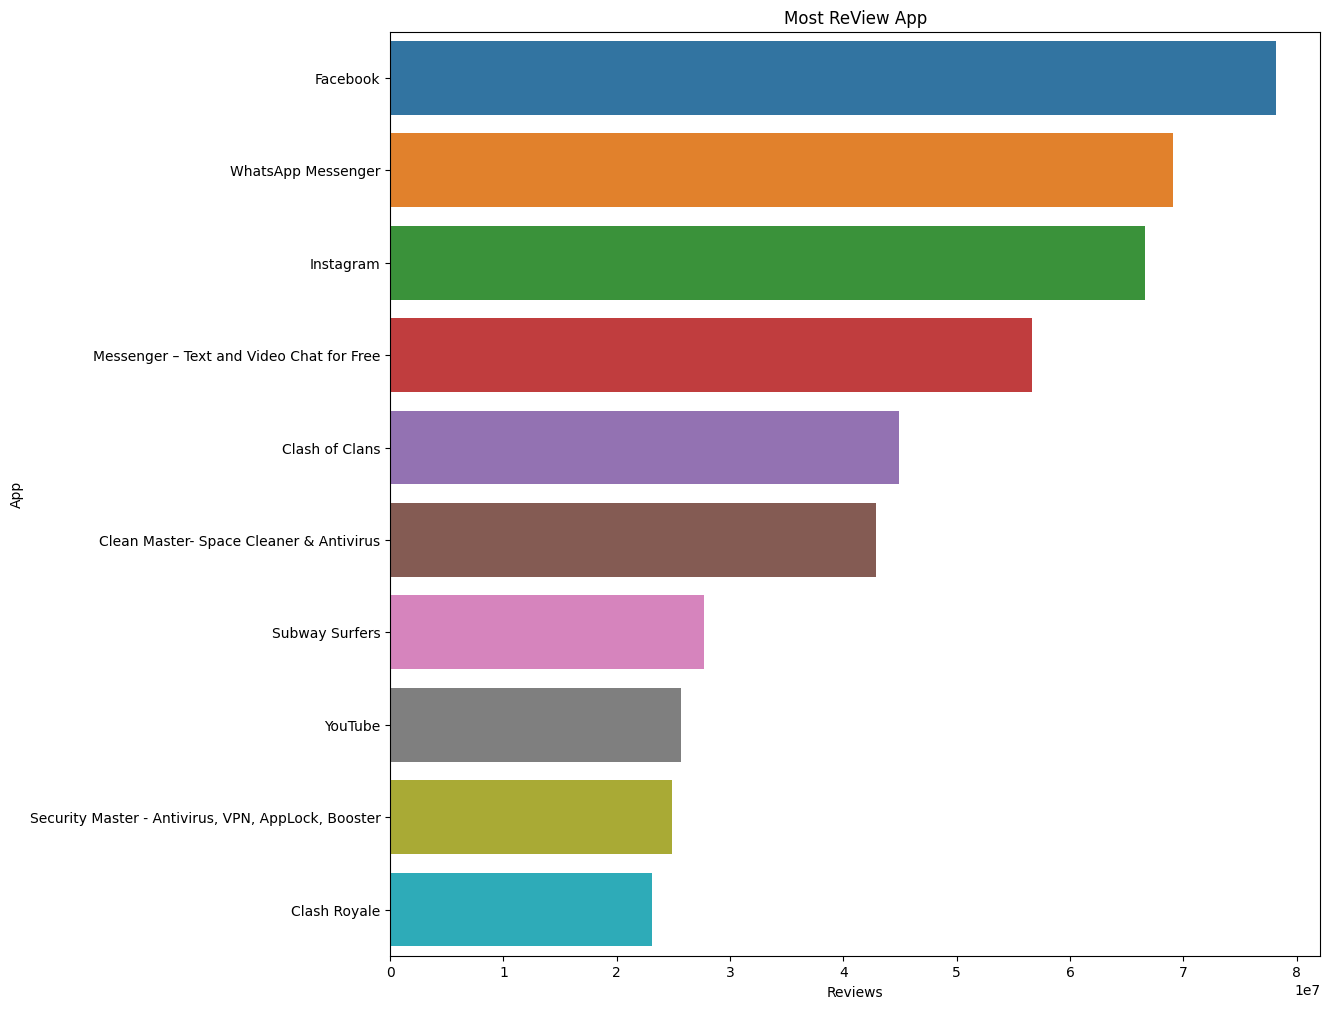

In [107]:
plt.figure(figsize=(12,12))
sns.barplot(x="Reviews",y="App",data=reviews)
plt.title("Most ReView App")

<AxesSubplot:ylabel='None'>

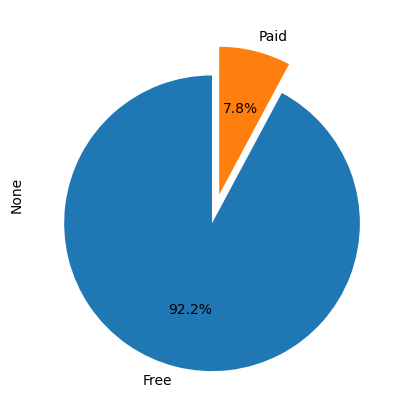

In [110]:
copy_data.value_counts("Type").plot.pie(startangle=90,explode=(0.2,0),autopct="%1.1f%%")

<AxesSubplot:ylabel='Installs'>

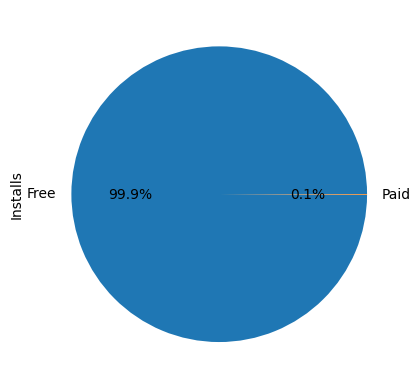

In [114]:
copy_data.groupby("Type")["Installs"].sum().plot.pie(autopct="%1.1f%%")

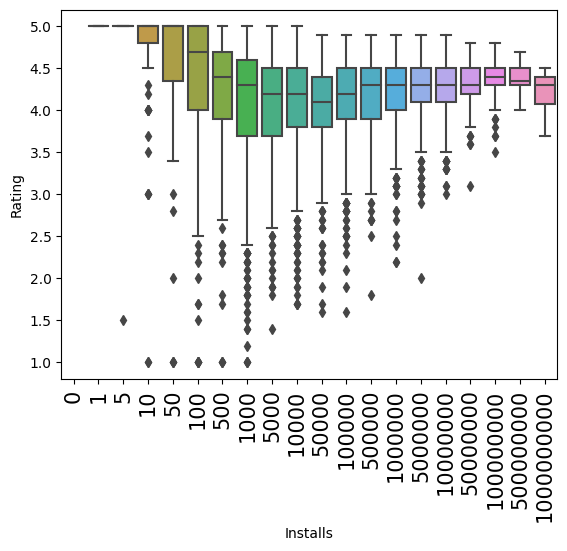

In [119]:
sns.boxplot(x = "Installs",y="Rating",data=copy_data)
plt.xticks(size=15,rotation=90)
plt.show()

Text(0.5, 1.0, 'high size ')

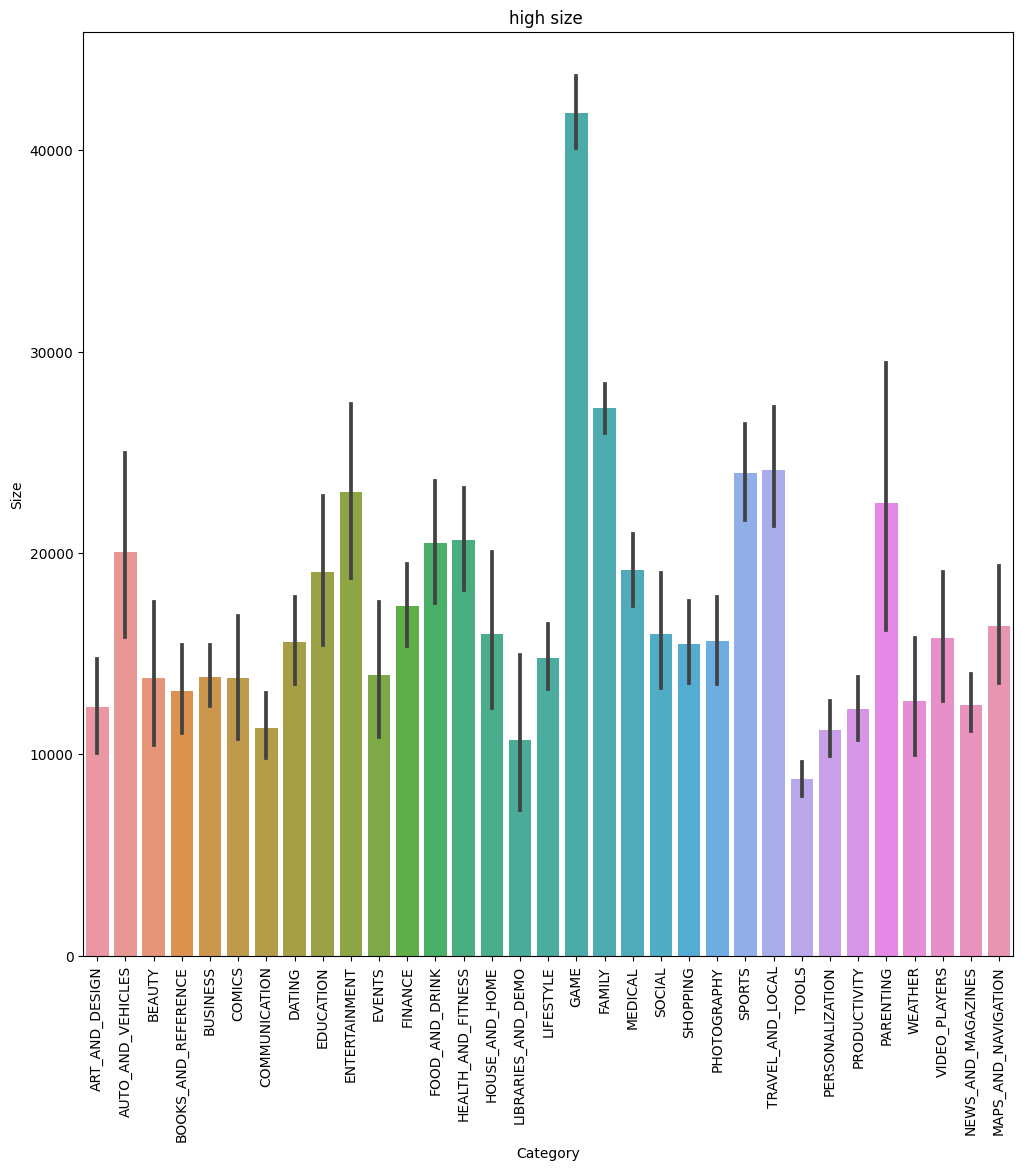

In [123]:
plt.figure(figsize=(12,12))
sns.barplot(x = "Category",y="Size",data=copy_data)
plt.xticks(rotation=90)
plt.title("high size ")

Text(0.5, 1.0, 'high size ')

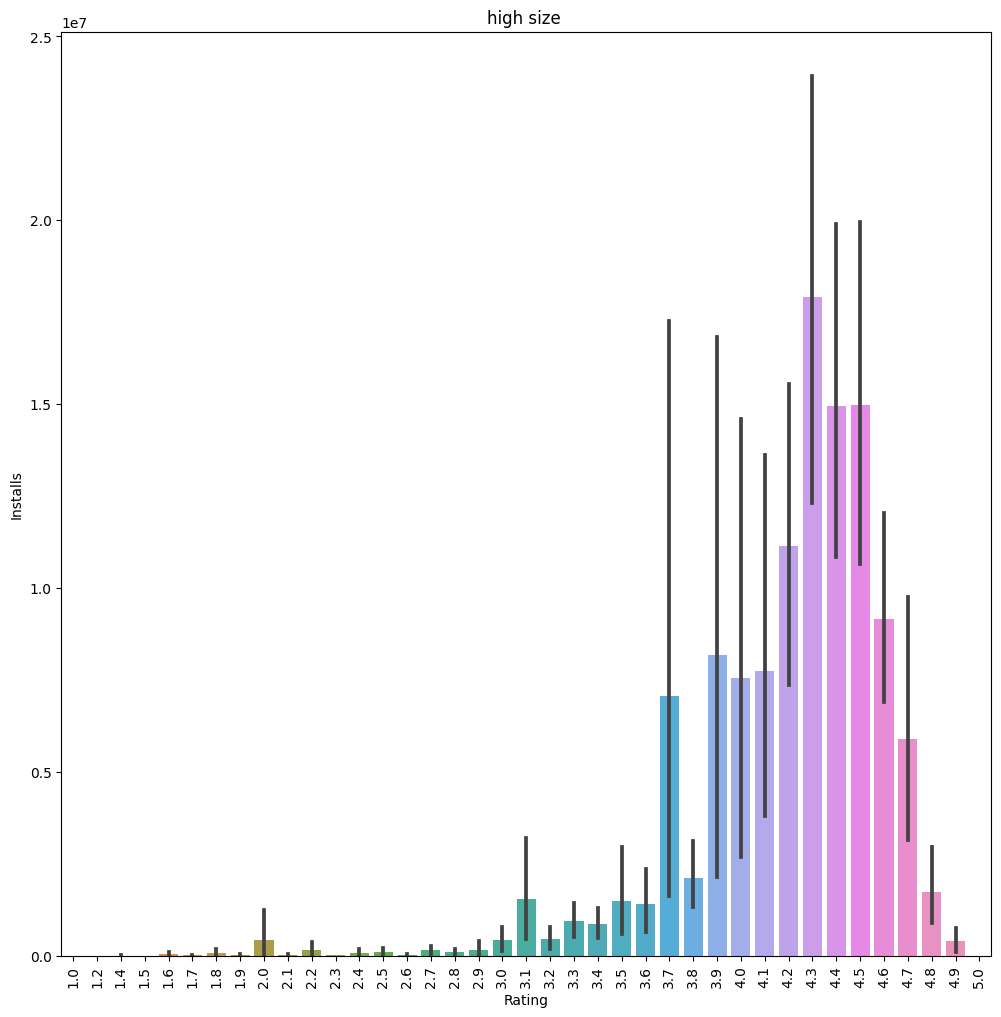

In [125]:
plt.figure(figsize=(12,12))
sns.barplot(x = "Rating",y="Installs",data=copy_data)
plt.xticks(rotation=90)
plt.title("high size ")

Text(0.5, 1.0, 'high size ')

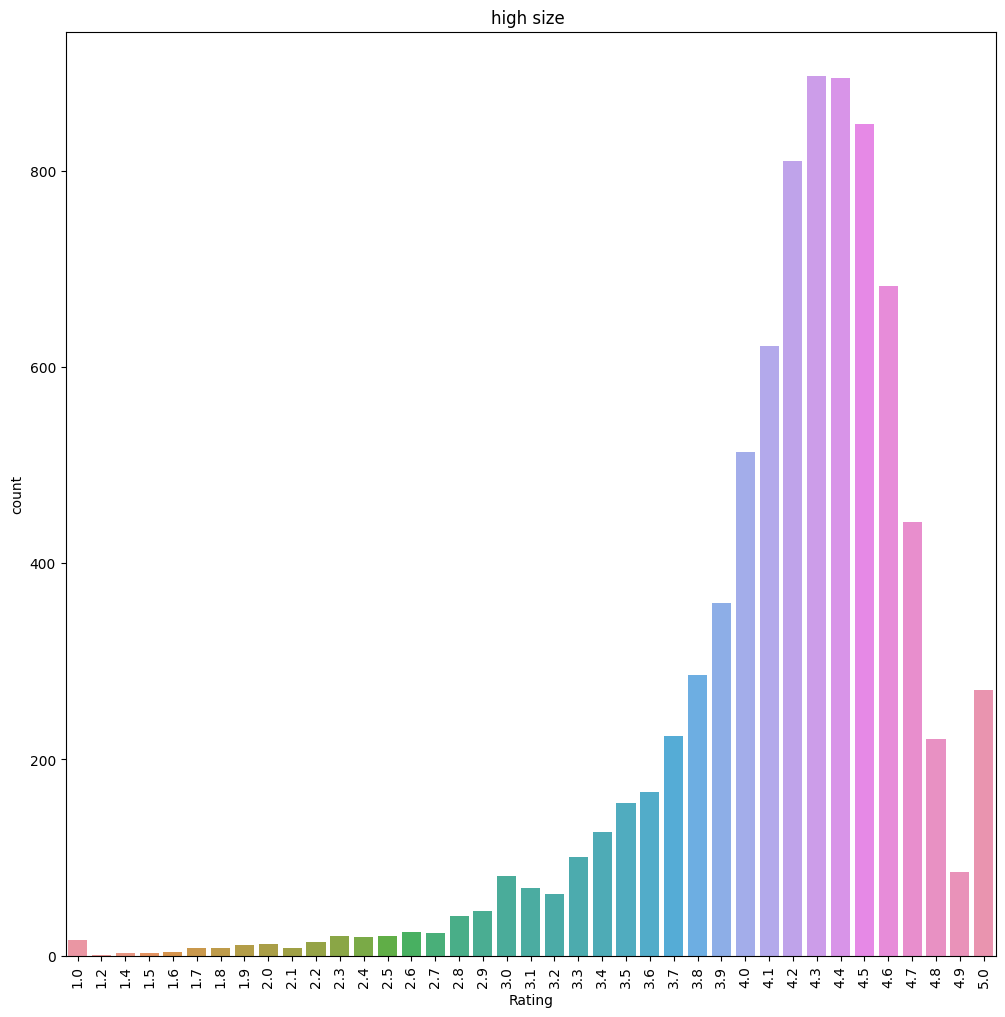

In [127]:
plt.figure(figsize=(12,12))
sns.countplot(x = "Rating",data=copy_data)
plt.xticks(rotation=90)
plt.title("high size ")

<AxesSubplot:>

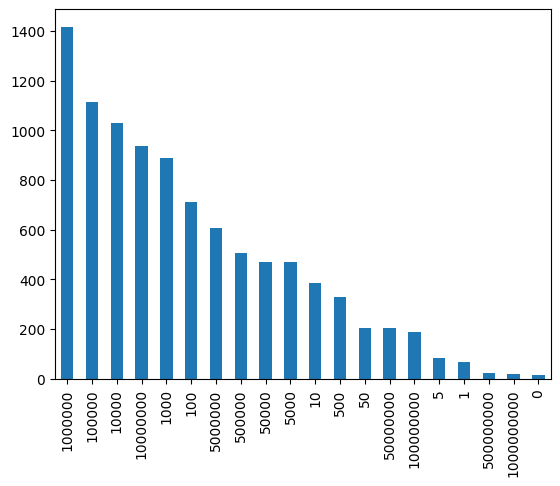

In [130]:
copy_data["Installs"].value_counts().plot.bar()

In [133]:
# Fatch null colums
[i for i in copy_data.columns if copy_data[i].isnull().sum() >=1]

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [141]:
year = copy_data.groupby("year")["Installs"].sum().reset_index()

In [142]:
year

,year,Installs
0,2010,100000
1,2011,17407100
2,2012,13992210
3,2013,103086365
4,2014,269785226
5,2015,405339475
6,2016,1292365793
7,2017,2893100739
8,2018,70127760619


<AxesSubplot:xlabel='year', ylabel='Installs'>

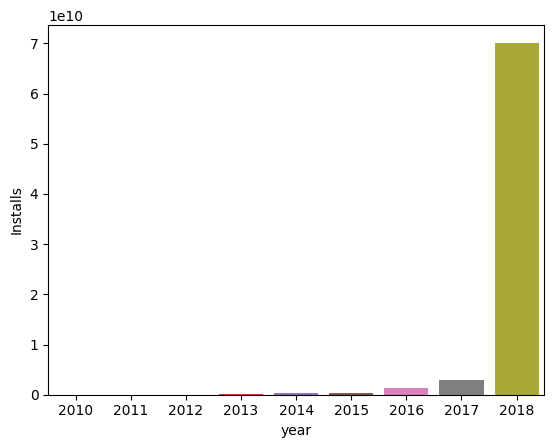

In [151]:
sns.barplot(x="year",y="Installs",data=year)